In [1]:
import tensorflow as tf
print('GPU:', tf.config.list_physical_devices('GPU'))

2024-03-10 22:22:57.162804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 22:22:57.774809: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu/lib/
2024-03-10 22:22:57.774898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-03-10 22:22:58.495268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-10 22:22:58.529713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-10 22:22:58.529871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
# set project root to correct path
import sys
import os

proj_path = '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode'
if proj_path not in sys.path:
  sys.path.append(proj_path)

from set_path import set_path
set_path()

print(sys.path)
print(os.getcwd())

setting cwd to '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation'
['/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode/jupyter', '/home/payam/miniconda3/envs/tf2-gpu/lib/python39.zip', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/lib-dynload', '', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/site-packages', '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode']
/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation


In [3]:
from loader.model_loader import load_model
from evaluate.visualize_tSNE import show_tSNE

# REMEDIS 50x1-m

In [1]:
loaded_model = load_model(
  'remedis_50x1-m',
  'base-models/remedis/cxr-50x1-remedis-m/',
  loader='keras',
  input_shape=[448,448,3],
  show_summary=True)
pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
model = tf.keras.Sequential([loaded_model, pooling_layer])
model.summary()

NameError: name 'load_model' is not defined

In [5]:
signature = model.signatures['serving_default']
input_tensor_name = signature.inputs[0].name
input_tensor_shape = signature.inputs[0].shape
print('input_tensor_name:', input_tensor_name)
print('input_tensor_shape:', input_tensor_shape)
print('signature:',signature)

AttributeError: 'Sequential' object has no attribute 'signatures'

input size (width, height): (448, 448)
input shape: (160, 448, 448, 3)
labels shape: (160, 7)
class_names: ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Pleural Effusion'
 'Pneumonia' 'Pneumothorax']


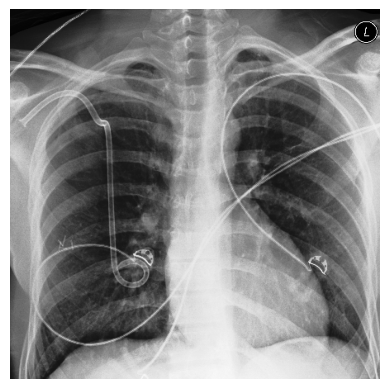

label: [0 0 0 0 0 0 1]


2024-03-10 22:25:19.048841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-03-10 22:25:19.801404: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-10 22:25:20.917333: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.12GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Features shape: (160, 2048)
processing class: Atelectasis red
processing class: Cardiomegaly cyan
processing class: Consolidation green
processing class: Edema pink
processing class: Pleural Effusion orange
processing class: Pneumonia purple
processing class: Pneumothorax blue


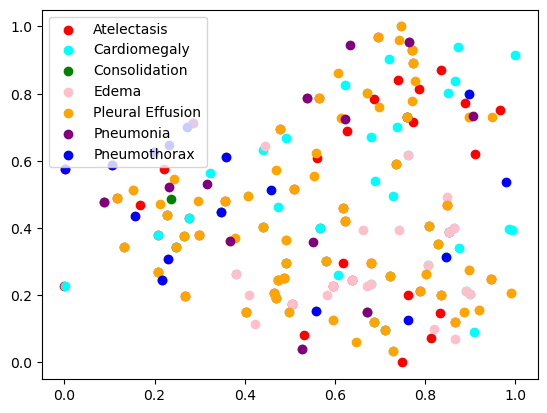

In [5]:
fig = show_tSNE(model)
fig.show()

# REMEDIS 152x2-m

2024-02-28 03:46:09.280793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 03:46:09.281938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-28 03:46:09.282109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-28 03:46:09.282233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on


Summary of the loaded model 'remedis_152x2-m':
model: <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f9382ede550>
tensorflow_version: 2.13.0
dir: ['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_trackable_child', '_add_variable_with_custom_getter', '_blocks', '_checkpoint_dependencies', '_default_save_signature', '_deferred_dependencies', '_delete_tracking', '_deserialization_dependencies', '_deserialize_from_proto', '_export_to_saved_model_graph', '_gather_saveables_for_checkpoint', '_handle_deferred_dependencies', '_is_hub_module_v1', '_lookup_dependency', '_map_resources', '_maybe_initialize_trackable', '_name_based_a

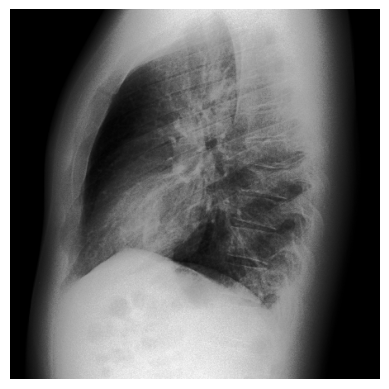

label: [0. 0. 0. 0. 0. 1. 0.]


2024-02-28 03:46:57.896312: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-28 03:46:57.896333: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2024-02-28 03:46:58.122694: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-02-28 03:46:58.438631: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were ava

ResourceExhaustedError: Graph execution error:

Detected at node 'Pad' defined at (most recent call last):
Node: 'Pad'
OOM when allocating tensor with shape[20480,226,226] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node Pad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_restored_function_body_42871]

In [4]:
# Repeat for other models
model = load_model('remedis_152x2-m', 'base-models/remedis/cxr-152x2-remedis-m/', loader='hub', show_summary=True)
fig = show_tSNE(model)
fig.show()

# REMEDIS 152x2-s

2024-03-10 22:08:41.580451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 22:08:41.581389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-10 22:08:41.581562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-10 22:08:41.581686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on


Summary of the loaded model 'remedis_152x2-s':
model: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f9e1de0e5b0>
name: remedis_152x2-s
dir: ['_TF_MODULE_IGNORED_PROPERTIES', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_existing_weight', '_add_trackable', '_add_trackable_child', '_add_variable_with_custom_getter', '_apply_output_shape_if_set', '_arguments', '_auto_config', '_auto_get_config', '_auto_track_sub_layers', '_autocast', '_autographed_call', '_batch_input_shape', '_build_input_shape', '_call_loss_if_trainable', '_call_spec', '_callable', '_callable_losses', '_captured_weight_regularizer', '_cast_single_

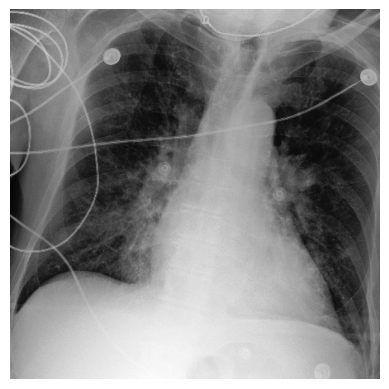

label: [0 0 0 1 0 1 0]


2024-03-10 22:09:48.559263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


Features shape: (64, 4096)
processing class: Atelectasis red
processing class: Cardiomegaly cyan
processing class: Consolidation green
processing class: Edema pink
processing class: Pleural Effusion orange
processing class: Pneumonia purple
processing class: Pneumothorax blue


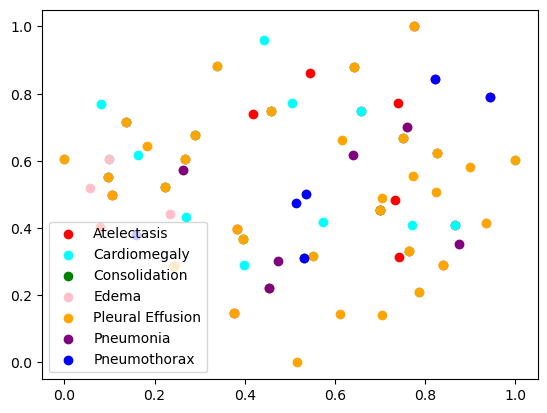

In [4]:
# Repeat for other models
loaded_model = load_model(
  'remedis_152x2-s',
  'base-models/remedis/cxr-152x2-remedis-s/',
  loader='keras',
  input_shape=[448,448,3],
  show_summary=True)
pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
model = tf.keras.Sequential([loaded_model, pooling_layer])
model.summary()

fig = show_tSNE(model, batch_size=32, num_batches=2)
fig.show()

# SimCLR 101x1


Summary of the loaded model 'simclr_r101_1x_sk1':
model: <tensorflow.python.trackable.autotrackable.AutoTrackable object at 0x7f929033bf40>
tensorflow_version: 2.1.0
dir: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_trackable_child', '_add_variable_with_custom_getter', '_checkpoint_dependencies', '_deferred_dependencies', '_delete_tracking', '_deserialization_dependencies', '_deserialize_from_proto', '_export_to_saved_model_graph', '_gather_saveables_for_checkpoint', '_handle_deferred_dependencies', '_is_hub_module_v1', '_lookup_dependency', '_map_resources', '_maybe_initialize_trackable', '_name_based_attribute_restore', '_name_based_restores', '_no_dependency', '_object_identifier',

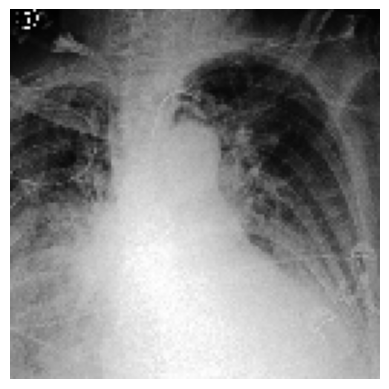

label: [0 0 0 0 1 0 0]
Output signatures: dict_keys(['proj_head_output', 'proj_head_input', 'logits_sup', 'default'])
features shape: (160, 1000)
reshaped_features shape: (160, 1000)
processing class: Atelectasis red
processing class: Cardiomegaly cyan
processing class: Consolidation green
processing class: Edema pink
processing class: Pleural Effusion orange
processing class: Pneumonia purple
processing class: Pneumothorax blue


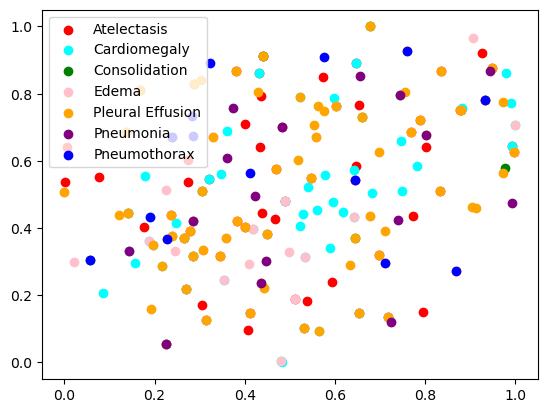

In [6]:
# Repeat for simclr
model = load_model('simclr_r101_1x_sk1', 'base-models/simclr/r101_1x_sk1/hub/', loader='hub', show_summary=True)
model = model.signatures['default']
fig = show_tSNE(model, signature_name='logits_sup')
fig.show()